In [1]:
import h5py
import numpy as np
import rdrand
import matplotlib.pyplot as plt
plt.ioff()
r = rdrand.RdRandom(rdrand.RdSeedom())

In [2]:
grid_size = 10
grid_refinement=5
modes=5
nos=5000
T_min=1000.0
T_max=2000.0
filename="MAMLAS_test_gaussian_3_2d.hdf5"

In [3]:
T_data = np.zeros((nos, grid_size*grid_refinement, grid_size*grid_refinement))
X = np.linspace(0, 1, grid_size*grid_refinement)
x, y = np.meshgrid(X, X)
max_T_data=0.0

i=0
cont_num=0
while i<nos:
    peak_x_0=r.uniform(0.1,0.9)
    peak_y_0=r.uniform(0.1,0.9)

    peak_variance=r.uniform(0.125,0.25)
    T_data[i] = T_data[i] + \
            r.uniform(0.3, 1.0)*np.exp(-((x-peak_x_0)**2 +
                                     (y-peak_y_0)**2)/(2*peak_variance**2))
        
    for j in range(modes-1):
        # peak_x_rel, peak_y_rel = (r.uniform(-peak_x_0, 1-peak_x_0), r.uniform(-peak_y_0, 1-peak_y_0))
        peak_r=r.uniform(np.sqrt(peak_variance),1)
        peak_dir=r.uniform(0,2*np.pi)
        peak_x=peak_x_0+peak_r*np.cos(peak_dir)
        peak_y=peak_y_0+peak_r*np.sin(peak_dir)
        peak_x-=np.floor(peak_x)
        peak_y-=np.floor(peak_y)
        peak_variance = r.uniform(0.125, 0.25)
        T_data[i] = T_data[i] + \
            r.uniform(0, 1)*np.exp(-((x-peak_x)**2 +
                                     (y-peak_y)**2)/(2*peak_variance**2))
    if np.max(T_data[i])>1:
        T_data[i]=0
        continue

    max_T_data=max(max_T_data,np.max(T_data[i]))
    i=i+1

print(np.sum([np.max(T_data[i])>1 for i in range(nos)]))

0


In [34]:
with h5py.File(filename,"w") as f:
    f.create_dataset("data",data=T_data)
    f.create_dataset("T_min", data=T_min)
    f.create_dataset("T_max", data=T_max)
    

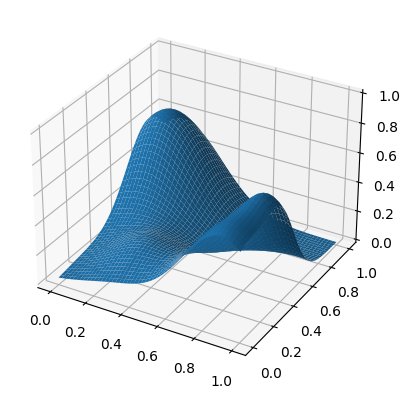

In [4]:
x,y=np.meshgrid(np.linspace(0,1,50),np.linspace(0,1,50))
fig=plt.figure()
ax=fig.add_subplot(projection="3d")
ax.plot_surface(x,y,T_data[r.randint(0,nos)])
ax.set_zlim(0,1)
plt.show()

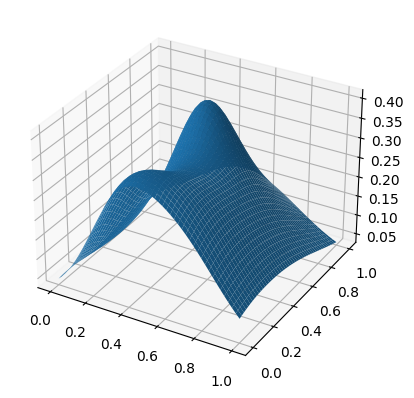

In [36]:
plt.show()